In [5]:
import pandas as pd
import pandas_datareader as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "morningstar", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [6]:
apple.head()

Close     High     Low    Open    Volume
Symbol Date                                                 
AAPL   2016-01-01  105.26  105.260  105.26  105.26         0
       2016-01-04  105.35  105.368  102.00  102.61  67649387
       2016-01-05  102.71  105.850  102.41  105.75  55790992
       2016-01-06  100.70  102.370   99.87  100.56  68457388
       2016-01-07   96.45  100.130   96.43   98.68  81094428

Populating the interactive namespace from numpy and matplotlib


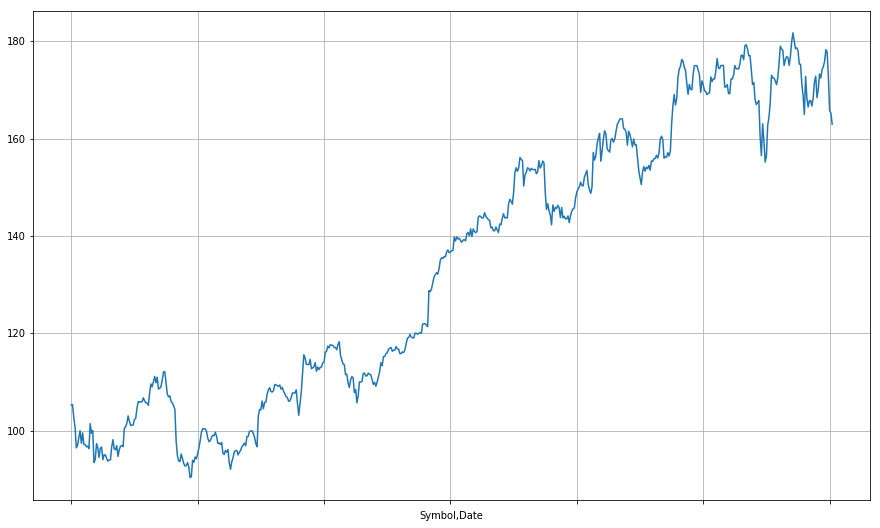

In [8]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


KeyError: 'Symbol.Date'

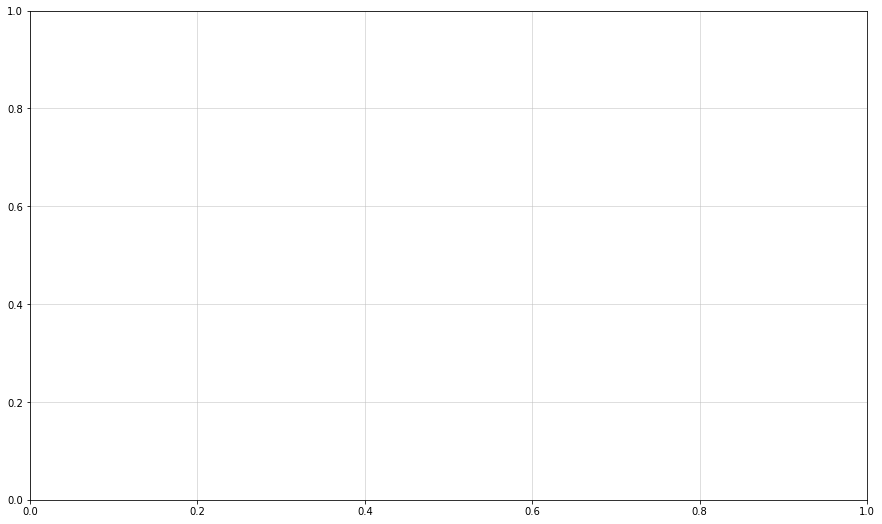

In [17]:
"""
Show how to use plot_day_summary_oclh function
"""
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import (MONDAY, DateFormatter, MonthLocator,
                              WeekdayLocator, date2num)

from mpl_finance import plot_day_summary_oclh

date1 = "2003-11-1"
date2 = "2003-12-1"

# every monday
mondays = WeekdayLocator(MONDAY)
daysFmt = DateFormatter("%d %b %y")


quotes = apple
# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]


fig, ax = plt.subplots()
plot_day_summary_oclh(ax, zip(quotes['Symbol.Date'],
                              quotes['Open'], quotes['Close'],
                              quotes['Low'], quotes['High']),
                      ticksize=3)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(daysFmt)
ax.autoscale_view()
ax.xaxis.grid(True, 'major')
ax.grid(True)

fig.autofmt_xdate()

plt.show()